# 1) Step 1 : EDA :
# Exploratey data analysis :

In [943]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [944]:
df=pd.read_csv('CarPrice_Assignment.csv')

#  exploratory data analysis(EDA)

In [945]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [946]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [947]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 # observation
 * data hasn't no null
 * 205 instance in data (rows)
 * 10 object fuelsystem, cylindernumber, enginetype , CarName , fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation
 * drop id

In [948]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [949]:
def data_info(data):
    cols= data.columns
    uniques_val= [data[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_uniques = [data[col].nunique() for col in cols ]
    dtype= [data[col].dtype for col in cols ]
    nulls = [data[col].isna().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({'col': cols , 'nulls':nulls , 'dtype':dtype ,'uniques_val' :uniques_val,'n_uniques':n_uniques,'duplicated':dup})        

In [950]:
data_info(df)

,col,nulls,dtype,uniques_val,n_uniques,duplicated
0,car_ID,0,int64,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",205,0
1,symboling,0,int64,"[0, 1, 2, 3, -1, -2]",6,0
2,CarName,0,object,"[toyota corona, toyota corolla, peugeot 504, s...",147,0
3,fueltype,0,object,"[gas, diesel]",2,0
4,aspiration,0,object,"[std, turbo]",2,0
5,doornumber,0,object,"[four, two]",2,0
6,carbody,0,object,"[sedan, hatchback, wagon, hardtop, convertible]",5,0
7,drivewheel,0,object,"[fwd, rwd, 4wd]",3,0
8,enginelocation,0,object,"[front, rear]",2,0
9,wheelbase,0,float64,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",53,0


 * the car_ID column is a unique column
 * the CarName also has 147 unique row.
 * curbweight has 171 unique row.**

In [951]:
nulpct = (df.isnull().sum() / len(df))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
car_ID              0.0
symboling           0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
enginetype          0.0
curbweight          0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
CarName             0.0
price               0.0
dtype: float64


In [952]:
def categorical_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
      if len(data[column].unique()) < numbers_of_cat_value:
          plt.subplot(total_rows , total_cols , plot_index)
          sns.countplot(x=data[column], palette="rocket", hue=data[column])
          plt.title(f"count plot of {column}")
          plot_index += 1
      else:
           print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

column 'car_ID' is not categorical.
column 'CarName' is not categorical.
column 'wheelbase' is not categorical.
column 'carlength' is not categorical.
column 'carwidth' is not categorical.
column 'carheight' is not categorical.
column 'curbweight' is not categorical.
column 'enginesize' is not categorical.
column 'boreratio' is not categorical.
column 'stroke' is not categorical.
column 'compressionratio' is not categorical.
column 'horsepower' is not categorical.
column 'peakrpm' is not categorical.
column 'citympg' is not categorical.
column 'highwaympg' is not categorical.
column 'price' is not categorical.


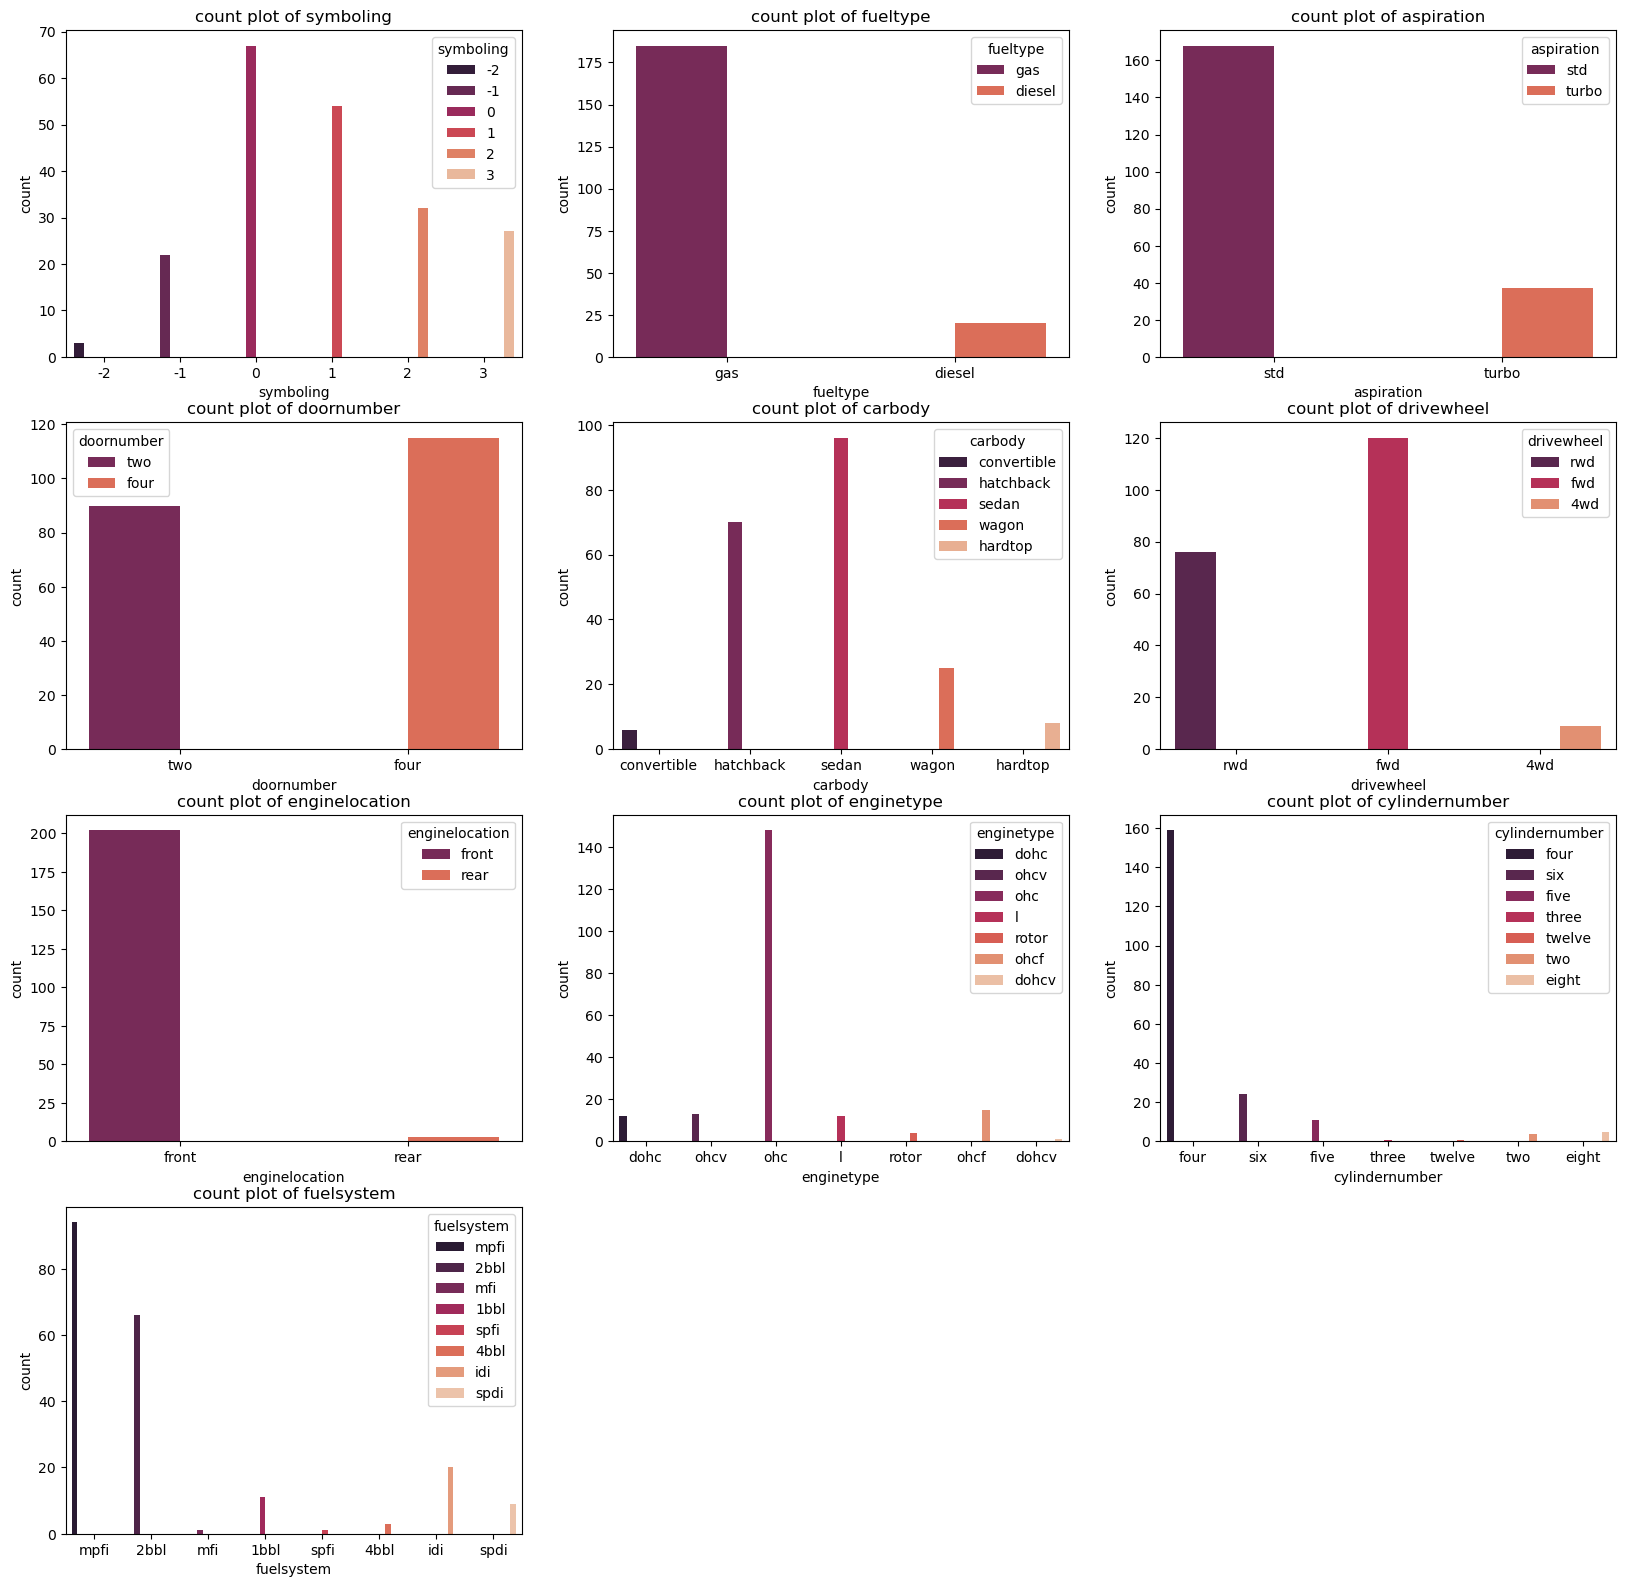

In [953]:
categorical_plot(df, df.columns, 10)

# the **categorical** columns that we have :


 *   symboling
 *   carname
 *   fueltype
 *   aspiration
 *   doonnumber
 *   carbody
 *   drivewheel
 *   enginelocation
 *   enginetype
 *   cylindernumber
 *   fuelsystem


*   The people who are in danger are between ( the zero stage : 35%, the first stage : 30%, the second stage : 15%, the third stage : 10% ), and the higher the stage, the greater the risk, and it is considered one of the most dangerous stages. They are the second and third stages.
(These percentages are approximate percentages)
*   we have more than 85% using the Gas.
*   we have more than 75% using the "std" spiration.
*   60% of people they like to buy four-door cars.
*   The sedan and hatchback car are the best-selling of all cars.
*   The best-selling of the cars in the weel drive is the "fwd" then "rwd".
*   more than of 95% of cars are used "front" engine.
*   The most common type of engine used in cars is "ohc".
*   The most common number of cylinder used in cars is "four".
*   The most two common types used in the gas system are "mpfi" and "2bbl".

# the **numerical** columns that we have :


*   weelbase
*   carlength
*   carwidth
*   carheight
*   curbweight
*   enginesize
*   boreratio
*   stroke
*   compressionratio
*   horsepower
*   peakrpm
*   citympg
*   highwaympg
*   price

In [954]:
Continuous_Features=["carlength","carwidth","carheight","curbweight","enginesize","boreratio"]

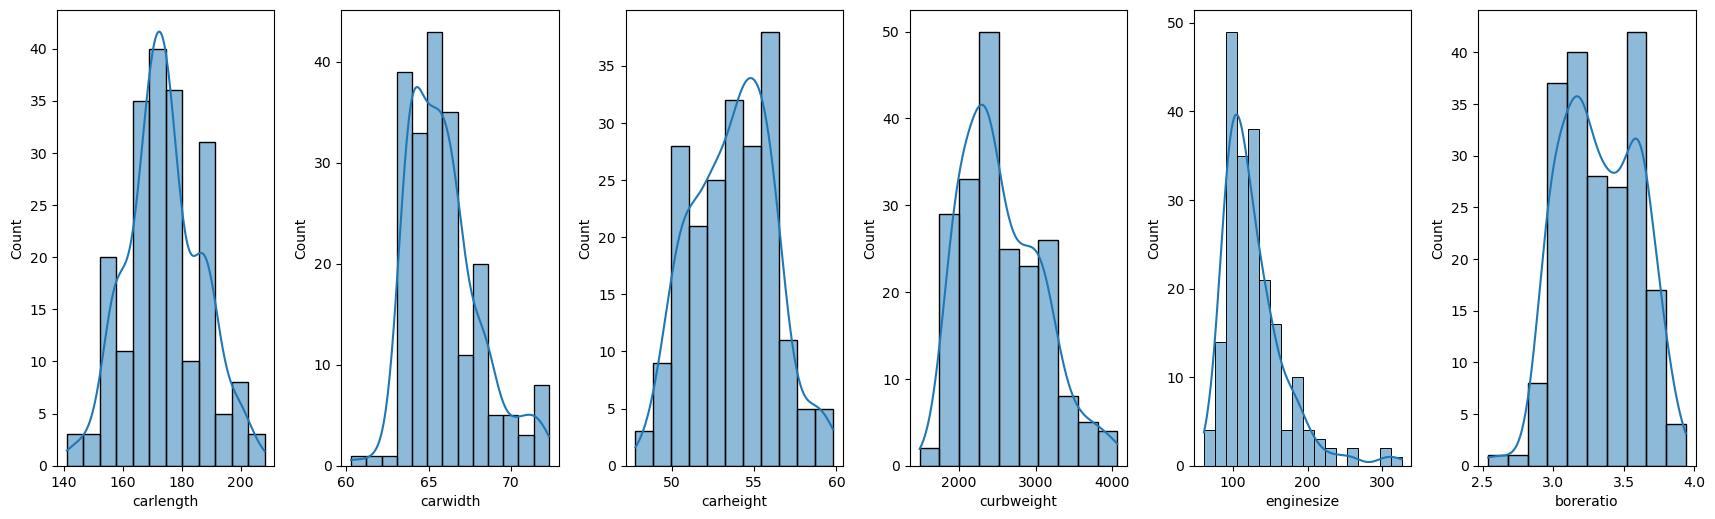

In [955]:
plt.figure(figsize=(20, 10),)
for i in range(len(Continuous_Features)):
    plt.subplot(2, 7, i + 1)
    sns.histplot(df[Continuous_Features[i]],kde=True)
plt.tight_layout()
plt.show()

**so that the continuous_features that we have are : carlenght - carwidth - carheight - curbheight - boreratio .**
*   the most carlenght used is between ( 165 - 190 )
*   the most carwidht used is between ( 64 - 66 )
*   the most carheight used is between ( 50 - 56 )
*   the most curbweight used is between ( 2000 - 3000 )
*   the most enginesize used is between ( 80 - 150 )
*   the most boreratio used is between ( 3.0 - 3.6 )

In [956]:
df.skew(numeric_only = True)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

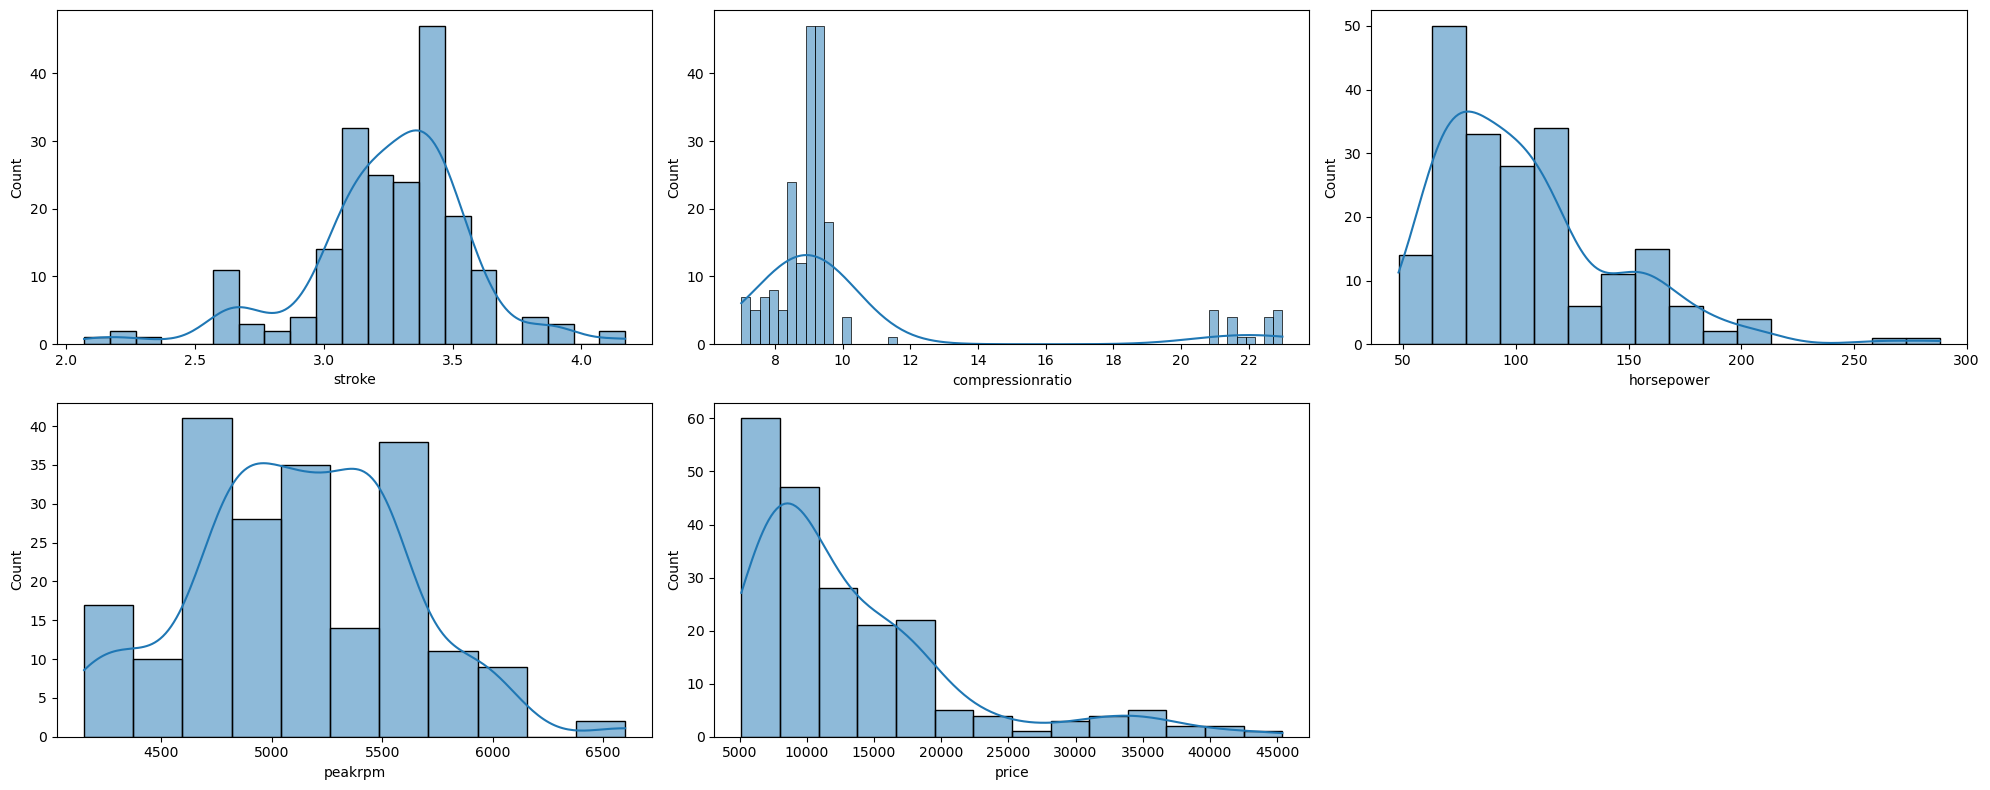

In [957]:
cont_features = ["stroke","compressionratio","horsepower","peakrpm","price"]
plt.figure(figsize=(20,8))
for i in range(len(cont_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df[cont_features[i]],kde=True)
plt.tight_layout()
plt.show()

*   **horsepower and price are right skew.**

In [958]:
def categorical_plot_target(data , columns , target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
        if  data[column].nunique() < 10:
            plt.subplot(total_rows , total_cols , plot_index)
            sns.countplot(x = data[column] , palette = "rocket" , hue = data [target])
            plt.title(f"count plot of {column} with symboling")
            plot_index += 1
        else:
            print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

column 'car_ID' is not categorical.
column 'CarName' is not categorical.
column 'wheelbase' is not categorical.
column 'carlength' is not categorical.
column 'carwidth' is not categorical.
column 'carheight' is not categorical.
column 'curbweight' is not categorical.
column 'enginesize' is not categorical.
column 'boreratio' is not categorical.
column 'stroke' is not categorical.
column 'compressionratio' is not categorical.
column 'horsepower' is not categorical.
column 'peakrpm' is not categorical.
column 'citympg' is not categorical.
column 'highwaympg' is not categorical.
column 'price' is not categorical.


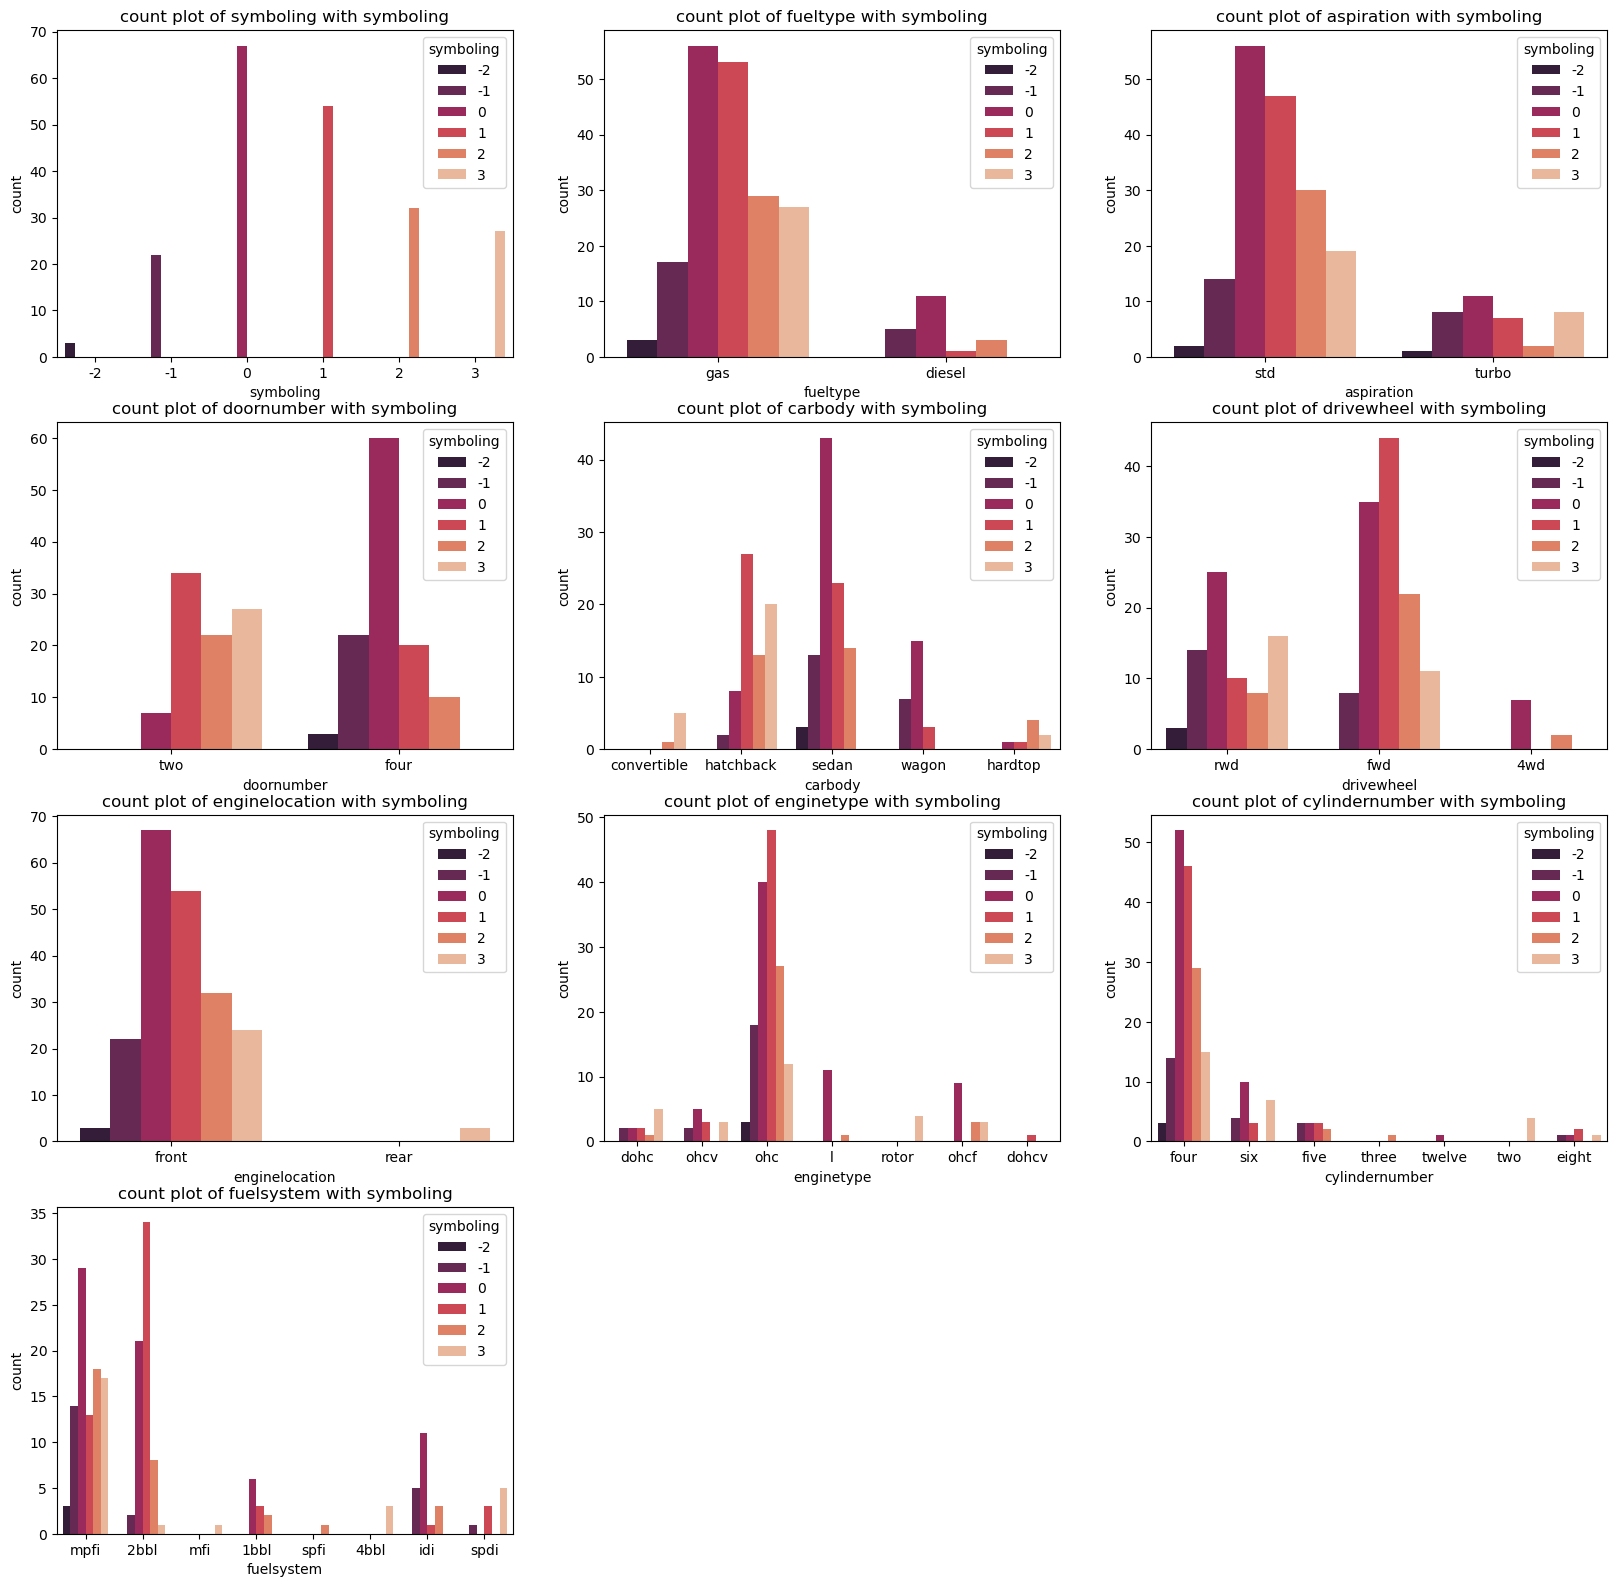

In [959]:
categorical_plot_target(df,df.columns,"symboling")

**there are alot of points we should pay attention to :**      


*   People who use "diesel" , their lives are not at risk as is the case with "gas" .
*   Cars with "turbo" siparetion is more risky than the one with "std"
*   Cars with "two-doors" is more risky than the one with "four-doors"
*   The safest car body types among all our types that we have it :

                                  1.   sedan
                                  2.   wegon
*   Cars with "rwd" is more risky than those with "fwd" & "4wd" , and the most safty one is "4wd".
*   The location engine at the "front" is the best.
*   The best engine type are :    
                                  1.   ohc
                                  2.   l
                                  3.   ohcf
*   The best cylinder engine are :   
                                  1.  four
                                  2.  five
                                  3.  twelve
*   The best fuel systems are :    
                                  1.   2bbl
                                  2.   lbbl
                                  3.   idi

# Correlation

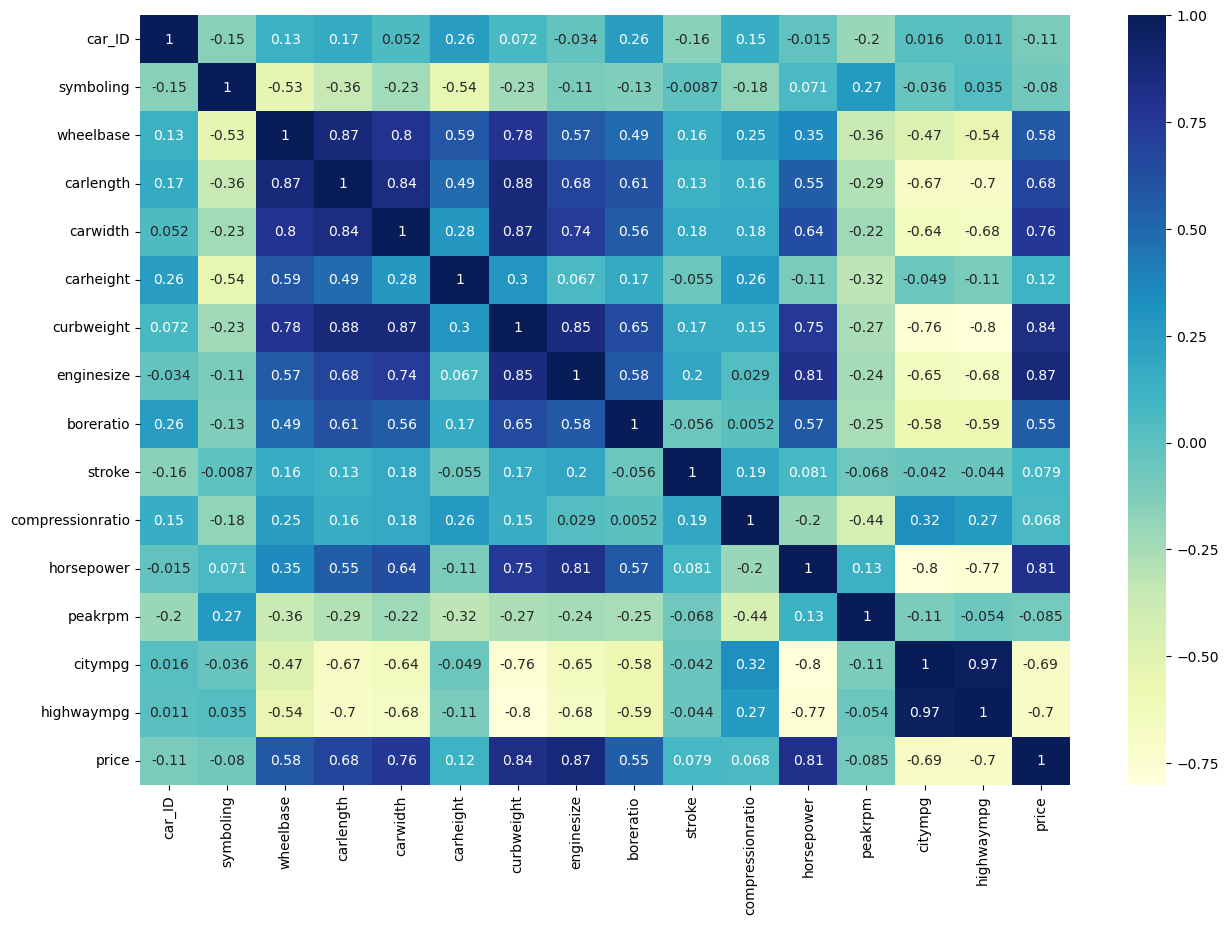

In [960]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True) , cmap="YlGnBu", annot=True);

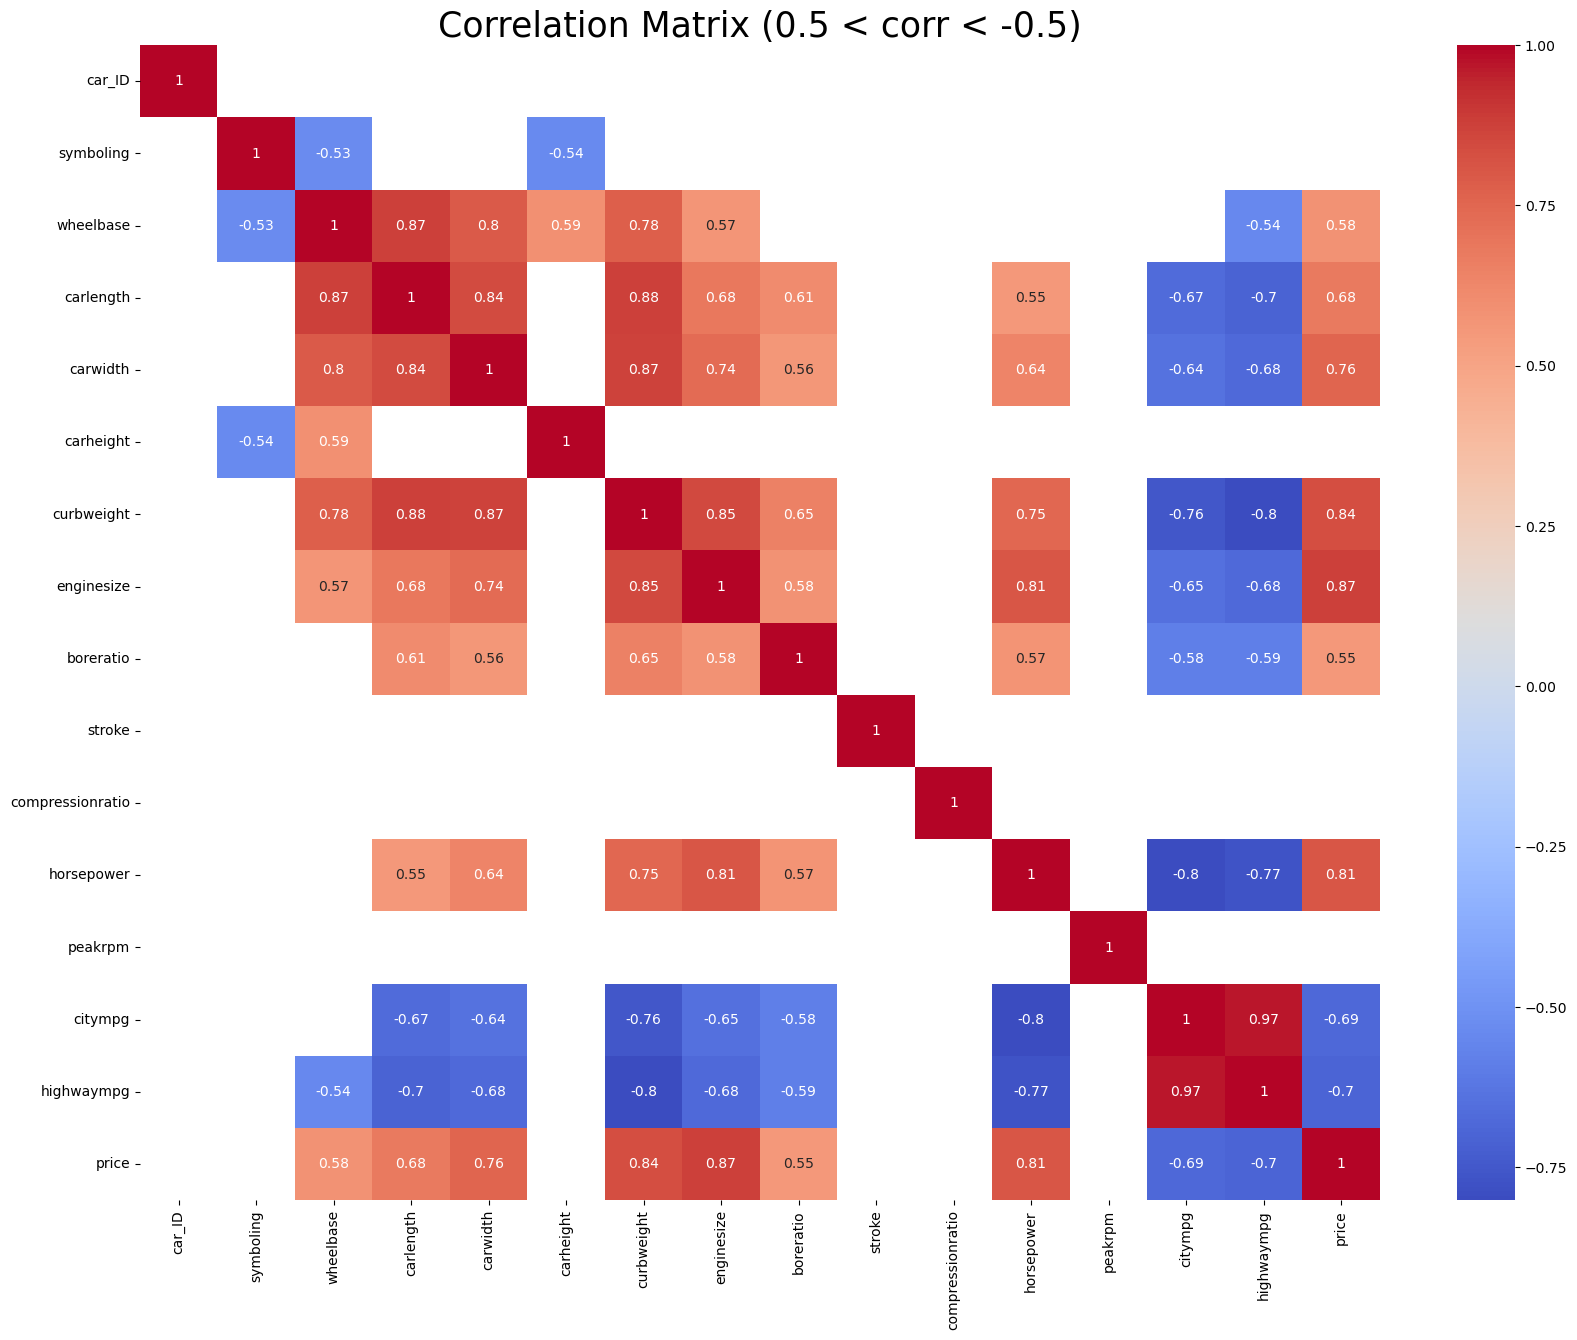

In [961]:
correlation_matrix = df.corr(numeric_only=True)
mask = (correlation_matrix < 0.5) & (correlation_matrix > -0.5)
plt.figure(figsize = (20 , 15))
# Plot the heatmap with the masked values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix (0.5 < corr < -0.5)', fontsize=25)
plt.show()

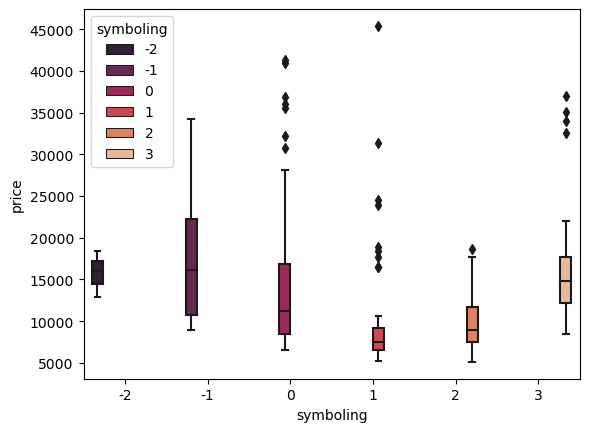

In [962]:
sns.boxplot(x="symboling", y="price", data = df, hue="symboling", palette="rocket");

**there are outliers in "symboling" in [0 , 1 , 2 , 3]**
*  many people in symboling -2 between 14,500 to 17,000.
*  many people in symboling -1 between 10,800 to 22,000.
*  many people in symboling 0 between 9,000 to 17,000.
*  many people in symboling 1 between 6,800 to 9,000.
*  many people in symboling 2 between 7,500 to 11,500.
*  many people in symboling 3 between 12,000 to 18,800.

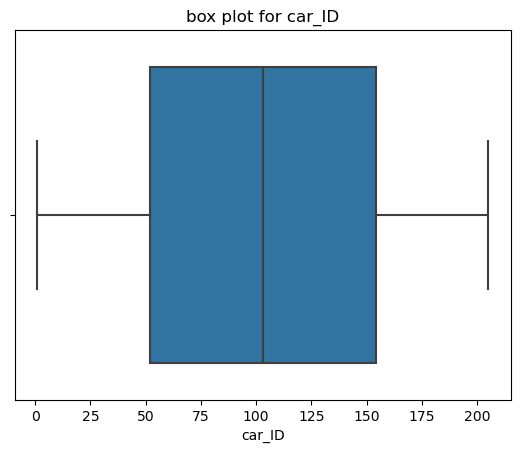

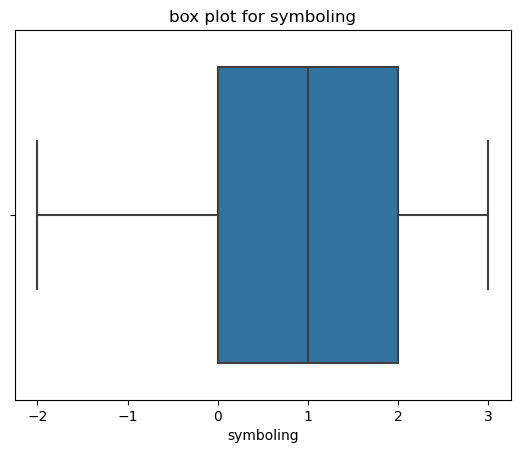

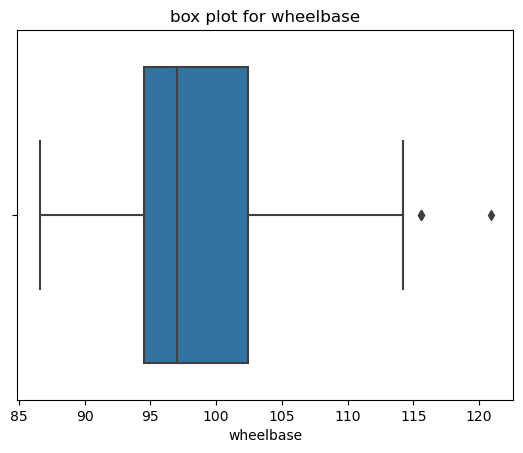

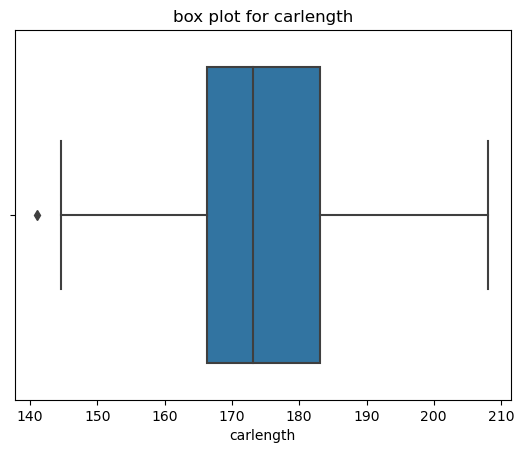

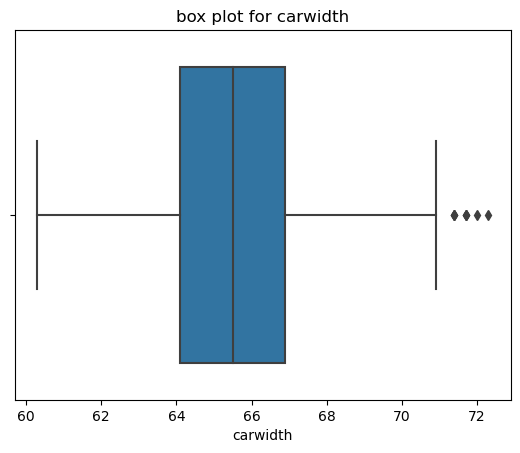

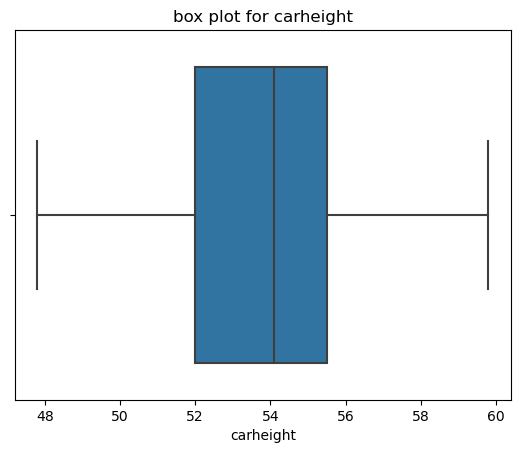

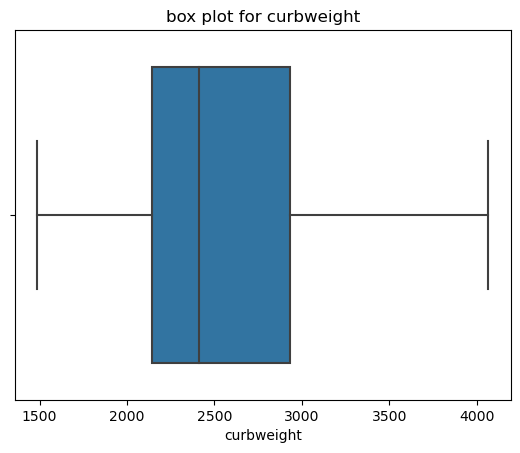

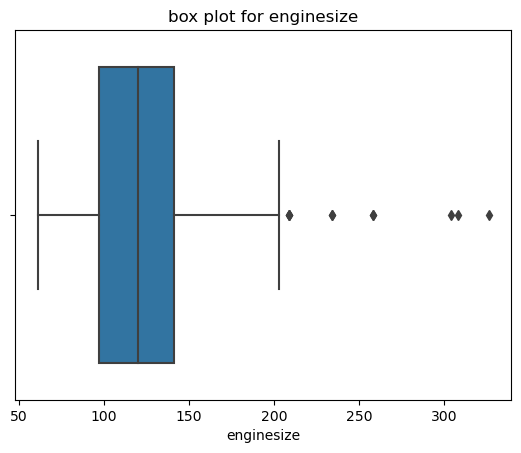

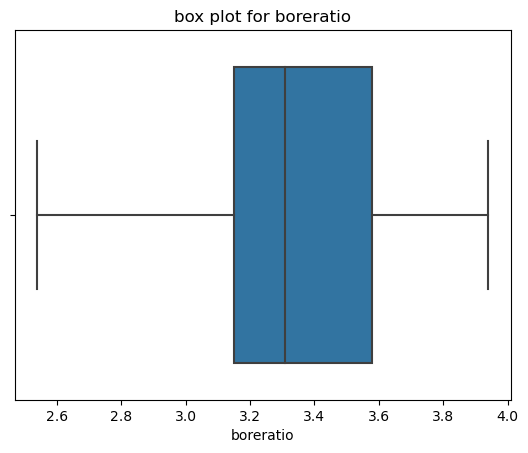

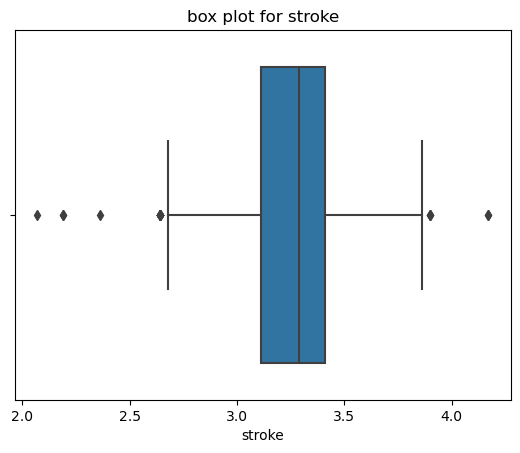

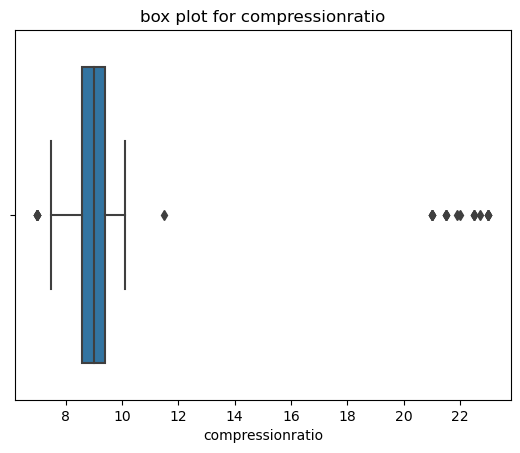

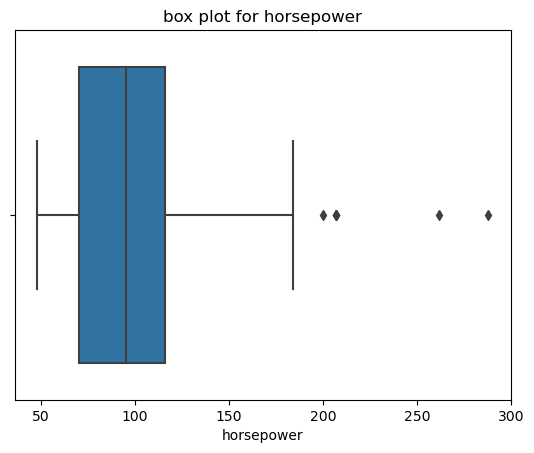

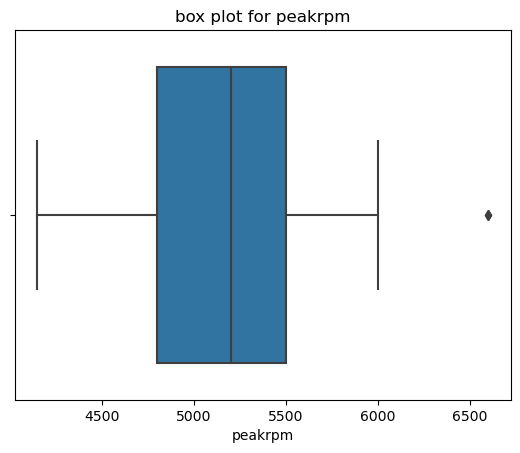

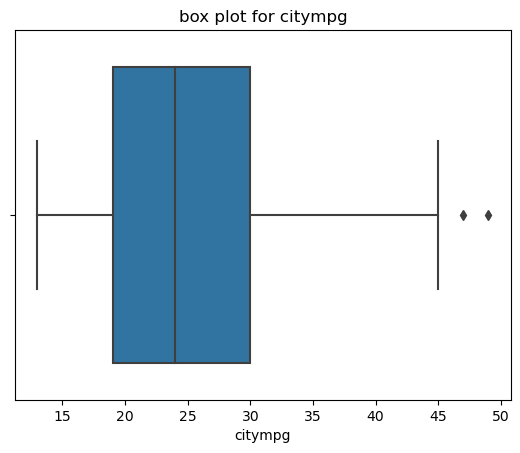

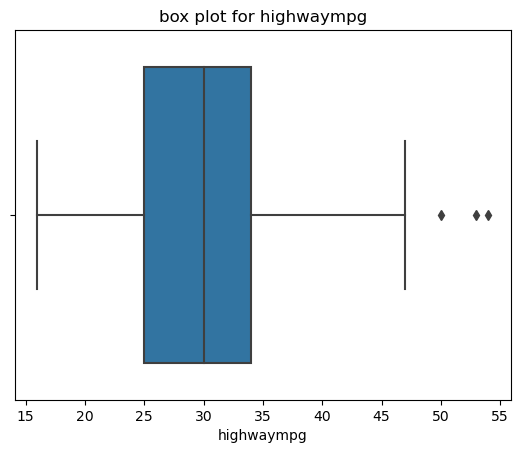

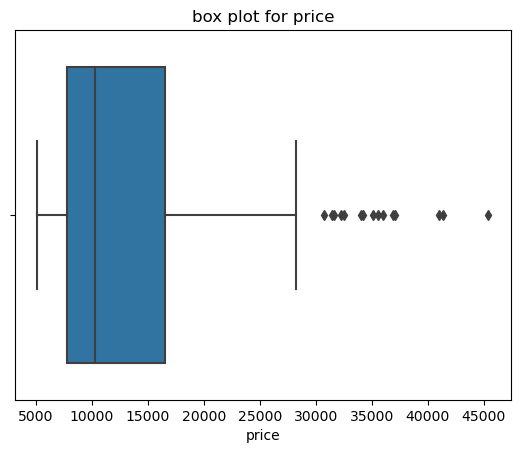

In [963]:
numeric_columns=df.select_dtypes(include=['number'])
for column in numeric_columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"box plot for {column}")
  plt.show()

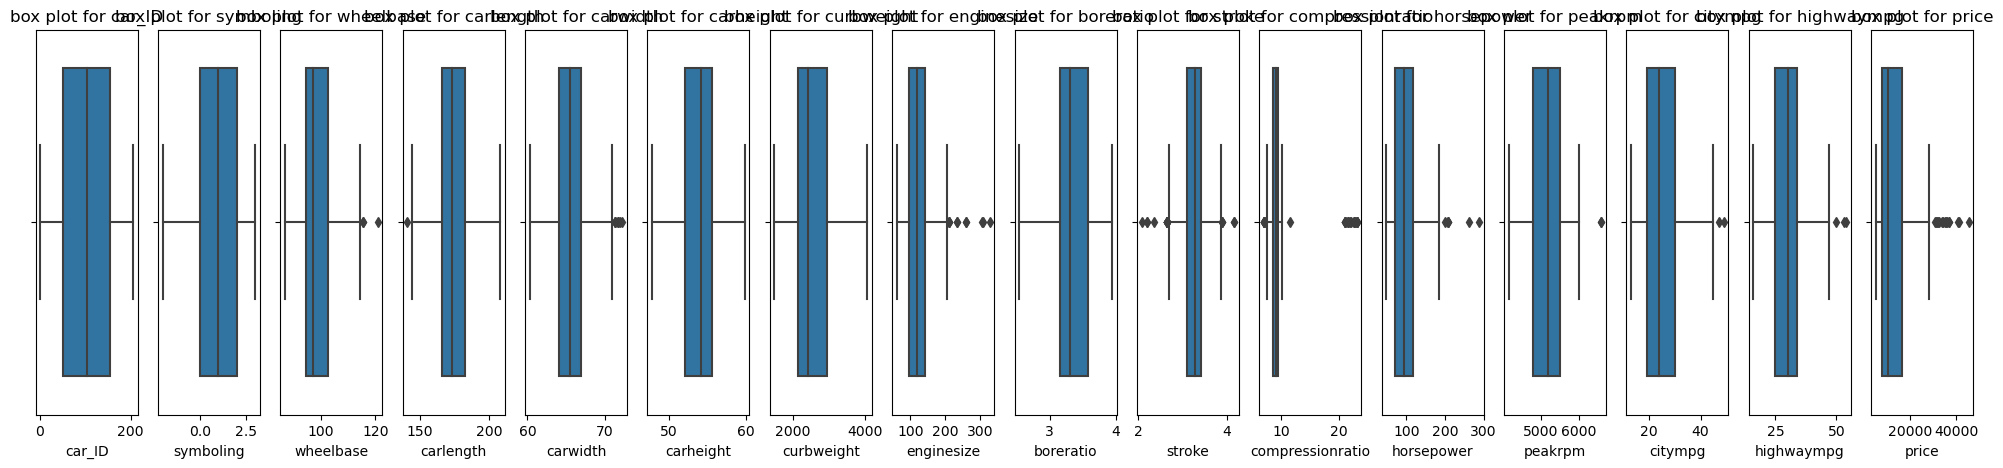

In [964]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include = ['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize = (25 , 5))
    for i , column in enumerate(numeric_columns.columns):
        plt.subplot(1 , num_cols , i + 1)
        sns.boxplot(x = numeric_columns[column])
        plt.title(f'box plot for {column}')
boxplot_numeric_columns(df)

# Data Preprocessing and Cleaning

In [965]:
df.duplicated().sum()

0

In [966]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# handling missing values

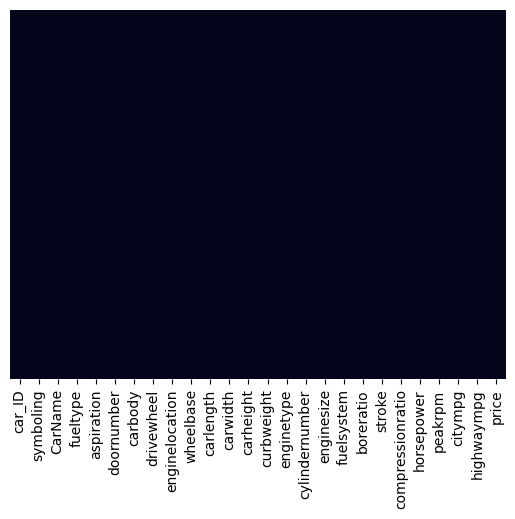

In [967]:
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = "rocket");

**There is no any missing values here in our data**

# Duplicated values

In [968]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [969]:
df.drop(["CarName"],axis=1).duplicated().sum()

0

In [970]:
index = df[df.drop(["CarName"], axis=1).duplicated()].index

In [971]:
df.drop(index , axis = 0)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [972]:
df.duplicated().sum()

0

# Outliers Detection

# (IQR)

In [973]:
def remove_outliers_iqr_countinuous(data, columns):
    for col in columns:
        if data[col].dtype != 'object':
            q1, q3 = data[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower_whisker, upper_whisker = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            filt = (data[col] < lower_whisker) | (data[col] > upper_whisker)
            data = data[~filt]
    return data.reset_index(drop=True)

In [974]:
df=remove_outliers_iqr_countinuous(df,["compressionratio"])

In [975]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
173,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
174,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
175,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# (Z-score)

In [976]:
def remove_outliers_z_countinuous(data , upper_threshod = 3 , lower_threshold = -3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    print(skewness)
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5 :
           z_scores = (data[column] - data[column].mean()) / data[column].std()
           outliers =(z_scores < lower_threshold ) | (z_scores > upper_limit)
           data = data[~outliers]
    return data.reset_index(drop = True)

In [977]:
remove_outliers_z_score_countinuous(df)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
169,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
170,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
171,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


# skewness

In [978]:
def skewness_log_square(data , numbers_of_cat_value):
  features = data.select_dtypes(np.number).columns
  for feature in features:
      if data[feature].nunique() <= numbers_of_cat_value:
          print(f"Categorical featuers {feature}")
          continue

      skewness = data[feature].skew()
      if skewness  > 0.5 :
        transformation = np.log1p
        transformation_name = "log"
      elif skewness < -0.5 :
        transformation = np.square
        transformation_name = "square"
      else :
        print(f"Normal distibution {feature}")
        continue

      logTr = ColumnTransformer(transformers = [(transformation_name.lower(), FunctionTransformer(transformation),[feature])])
      plt.figure(figsize=(15,6))
      plt.subplot(1,2,1)
      plt.title(f"distribution of {feature} before transformation" , fontsize = 15 )
      sns.histplot(data[feature], kde = True , color = "green")
      plt.subplot(1,2,2)

      df_transformed = pd.DataFrame(logTr.fit_transform(data))
      plt.title(f"Distribution of {feature} after transformation" , fontsize = 15)
      sns.histplot(df_transformed, bins = 20 , kde = True ,legend = False)
      plt.xlabel(feature)
      plt.show()

      print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew())} after log transformation. ")
      data[feature] = df_transformed[0]
  return data


Normal distribution car_ID
 Categorical Features symboling 


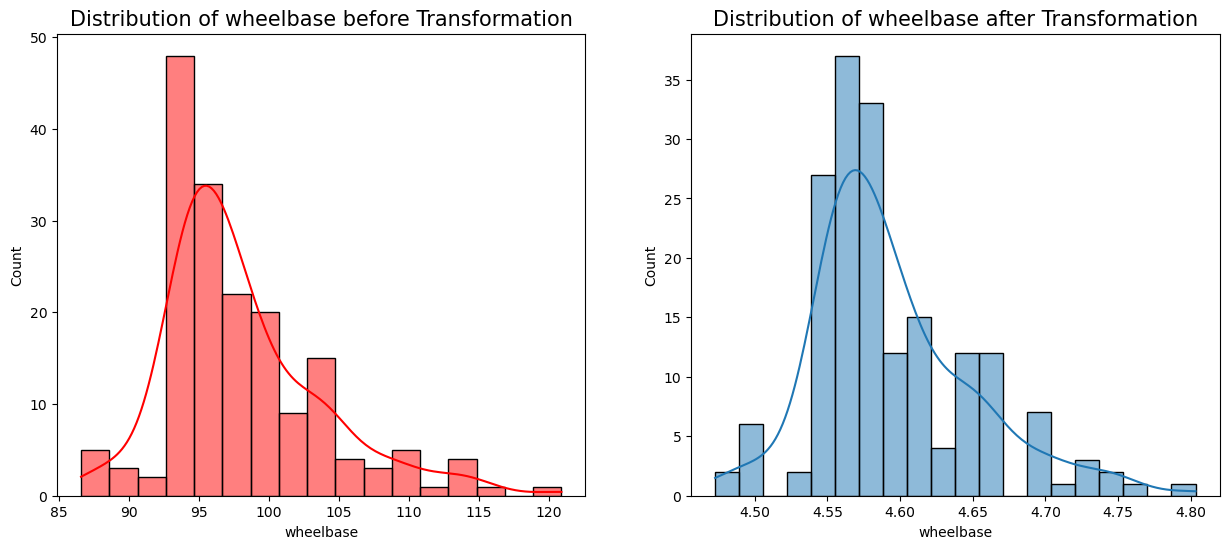

Skewness was 1.17704 before & is 0.97761 after Log transformation.
Normal distribution carlength


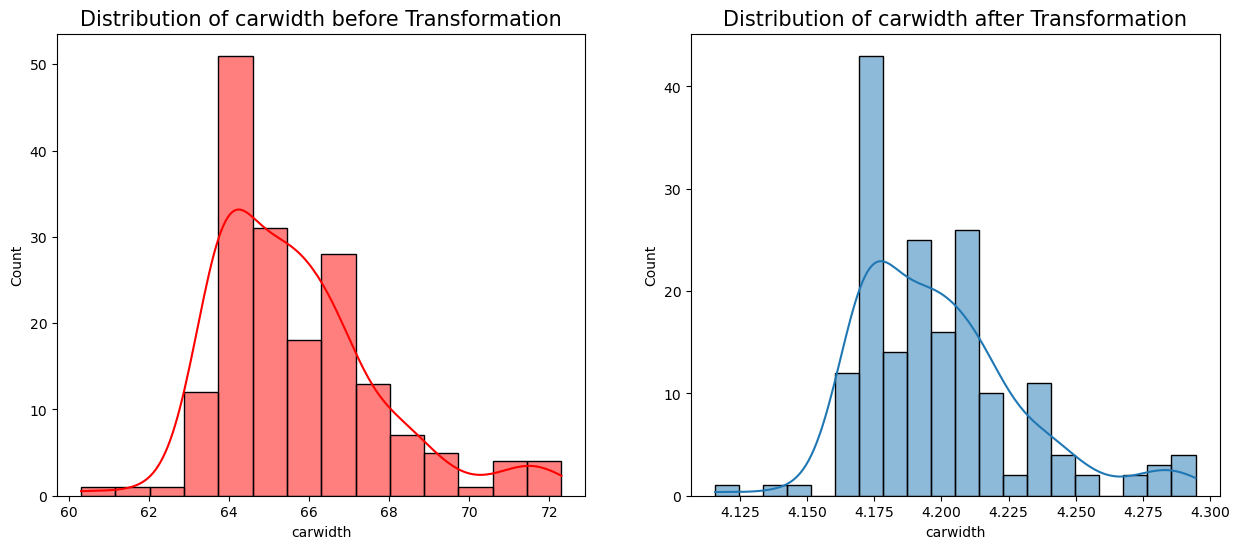

Skewness was 1.0839 before & is 0.98261 after Log transformation.
Normal distribution carheight


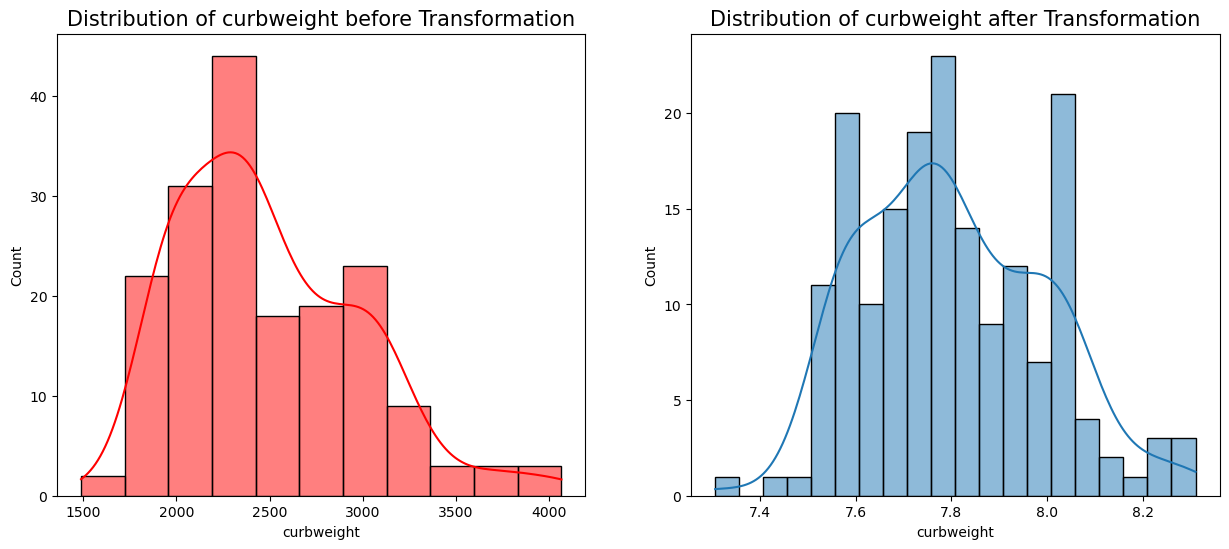

Skewness was 0.79256 before & is 0.34208 after Log transformation.


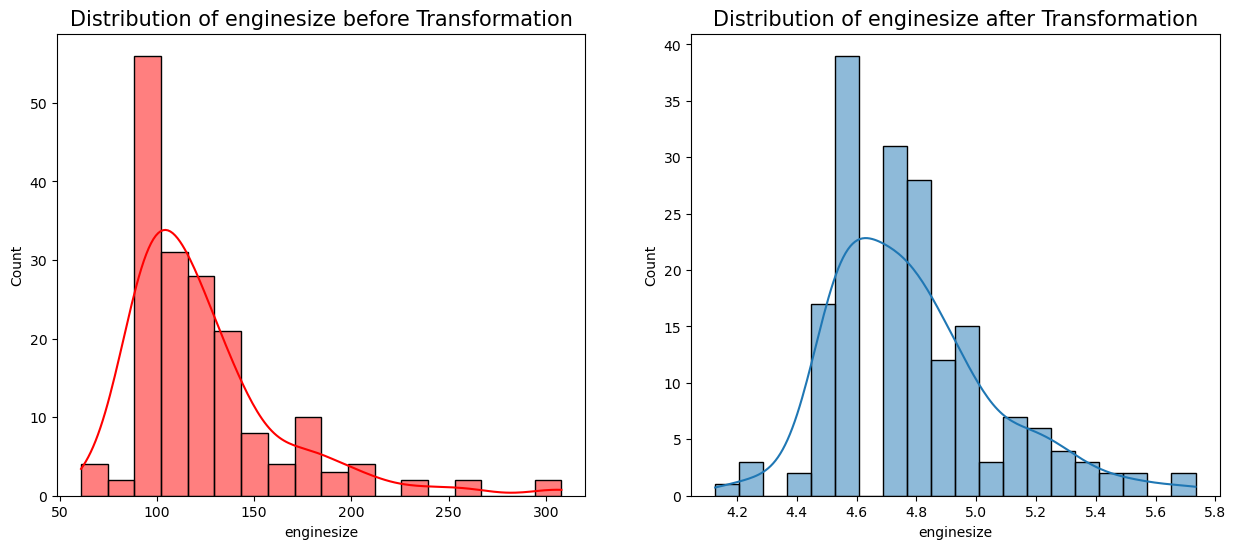

Skewness was 1.9481 before & is 0.94513 after Log transformation.
Normal distribution boreratio


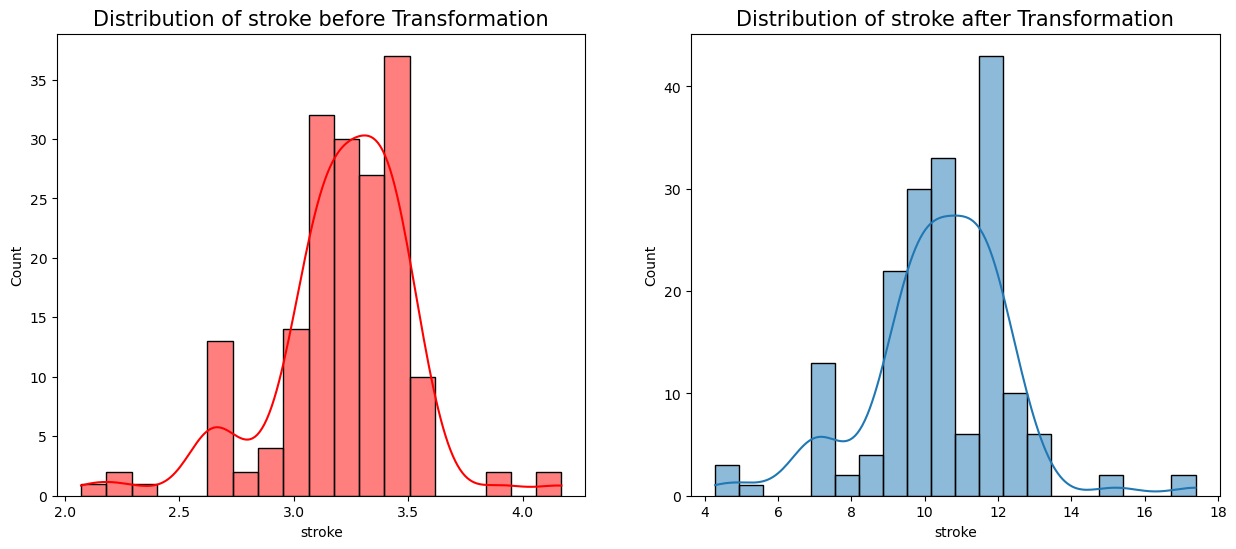

Skewness was -0.75475 before & is -0.16094 after Square transformation.


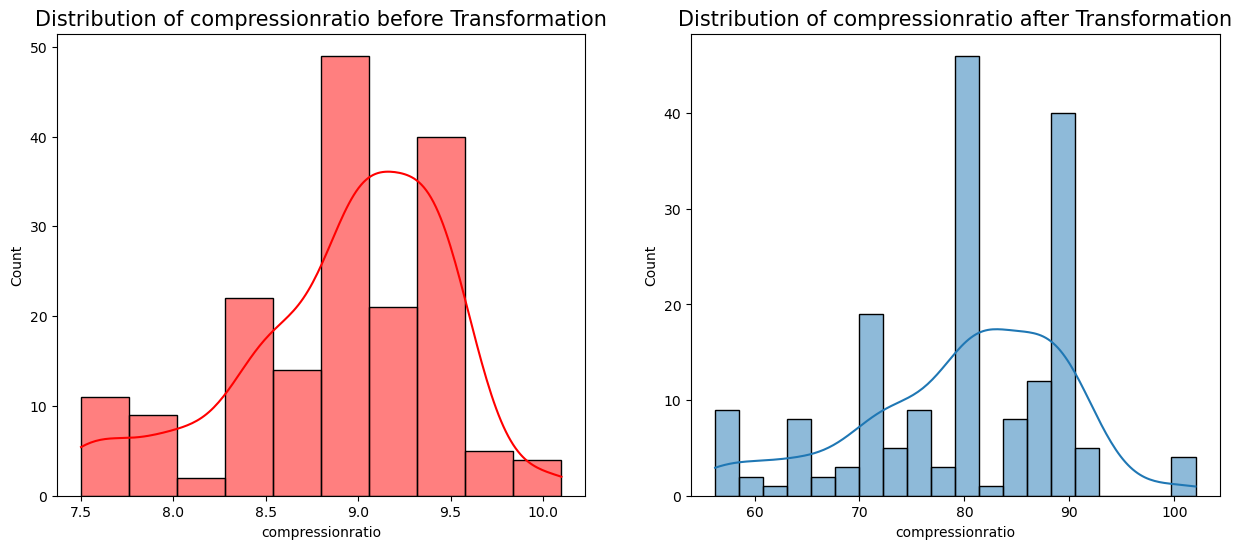

Skewness was -0.80353 before & is -0.64895 after Square transformation.


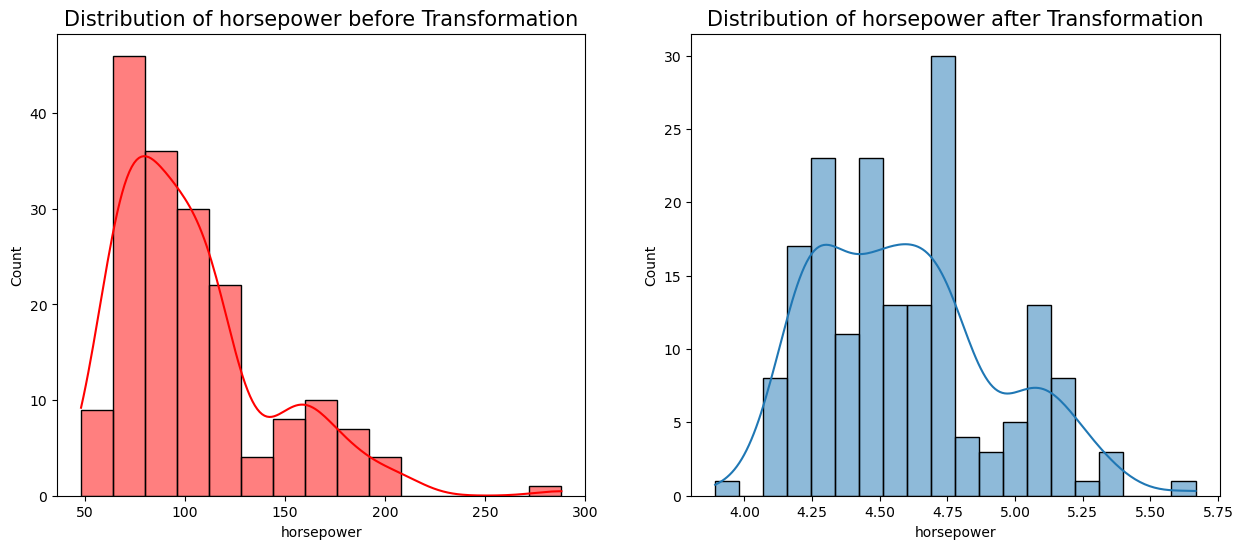

Skewness was 1.42709 before & is 0.59327 after Log transformation.
Normal distribution peakrpm


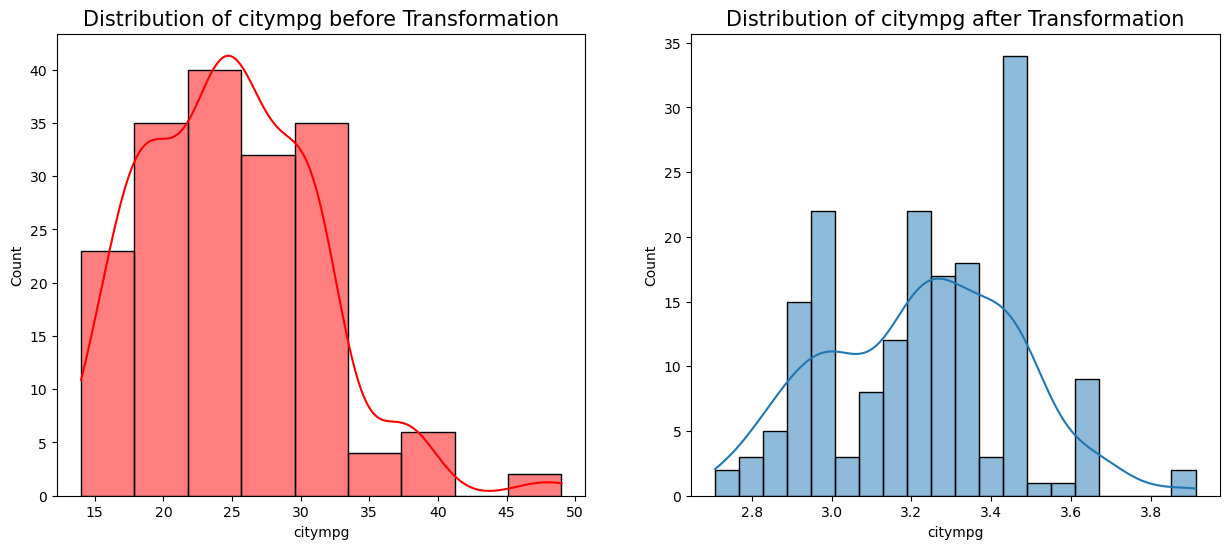

Skewness was 0.68565 before & is 0.02127 after Log transformation.
Normal distribution highwaympg


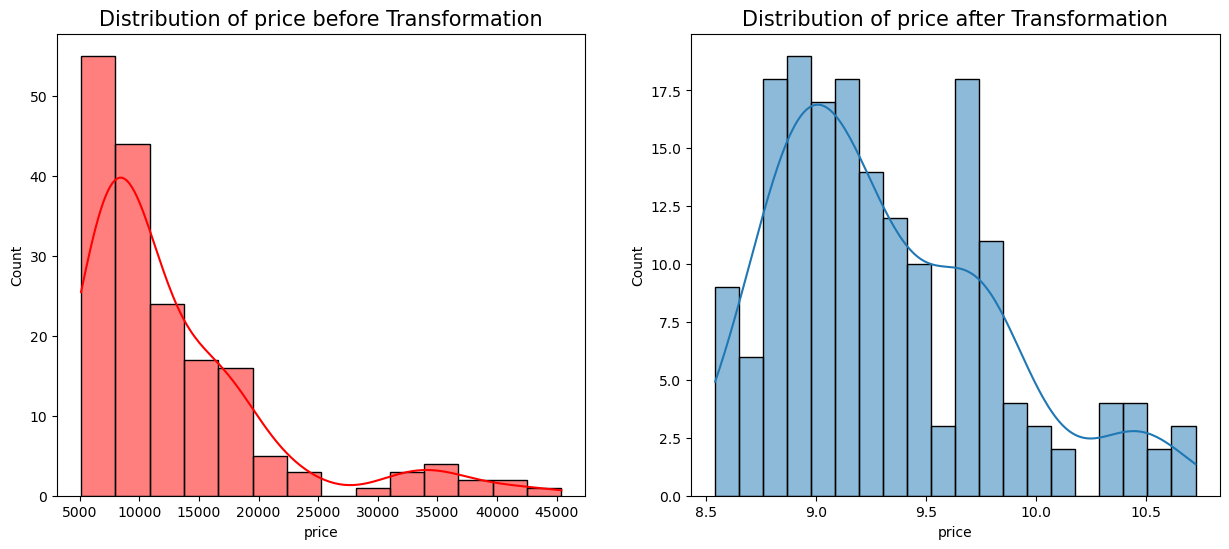

Skewness was 1.96734 before & is 0.80355 after Log transformation.


In [979]:
df_train=Skewness_log_square(df,10)

# Removing Irrelevant Columns

In [980]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [981]:
df.drop(["car_ID" , "CarName"] , axis = 1 , inplace = True)

In [982]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,...,4.875197,mpfi,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.510149
1,3,gas,std,two,convertible,rwd,front,4.495355,168.8,4.175925,...,4.875197,mpfi,3.47,7.1824,81.00,4.718499,5000,3.091042,27,9.711176
2,1,gas,std,two,hatchback,rwd,front,4.559126,171.2,4.197202,...,5.030438,mpfi,2.68,12.0409,81.00,5.043425,5000,2.995732,26,9.711176
3,2,gas,std,four,sedan,fwd,front,4.613138,176.6,4.207673,...,4.700480,mpfi,3.19,11.5600,100.00,4.634729,5500,3.218876,30,9.543306
4,2,gas,std,four,sedan,4wd,front,4.609162,176.6,4.210645,...,4.919981,mpfi,3.19,11.5600,64.00,4.753590,5500,2.944439,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,gas,turbo,four,wagon,rwd,front,4.656813,188.8,4.222445,...,4.875197,mpfi,3.62,9.9225,56.25,5.093750,5100,2.890372,22,9.849612
173,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,4.955827,mpfi,3.78,9.9225,90.25,4.744932,5400,3.178054,28,9.731869
174,-1,gas,turbo,four,sedan,rwd,front,4.701389,188.8,4.245634,...,4.955827,mpfi,3.78,9.9225,75.69,5.081404,5300,2.995732,25,9.854612
175,-1,gas,std,four,sedan,rwd,front,4.701389,188.8,4.247066,...,5.159055,mpfi,3.58,8.2369,77.44,4.905275,5500,2.944439,23,9.975157


# Encoding Categorical columns

In [983]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder

In [984]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         177 non-null    int64  
 1   fueltype          177 non-null    object 
 2   aspiration        177 non-null    object 
 3   doornumber        177 non-null    object 
 4   carbody           177 non-null    object 
 5   drivewheel        177 non-null    object 
 6   enginelocation    177 non-null    object 
 7   wheelbase         177 non-null    float64
 8   carlength         177 non-null    float64
 9   carwidth          177 non-null    float64
 10  carheight         177 non-null    float64
 11  curbweight        177 non-null    float64
 12  enginetype        177 non-null    object 
 13  cylindernumber    177 non-null    object 
 14  enginesize        177 non-null    float64
 15  fuelsystem        177 non-null    object 
 16  boreratio         177 non-null    float64
 1

In [985]:
one_hot_encoders = {
    'fueltype': OneHotEncoder(sparse=False),
    'aspiration': OneHotEncoder(sparse=False),
    'doornumber': OneHotEncoder(sparse=False),
    'carbody': OneHotEncoder(sparse=False),
    'drivewheel': OneHotEncoder(sparse=False),
    'enginelocation': OneHotEncoder(sparse=False),
    'enginetype': OneHotEncoder(sparse=False),
    'fuelsystem': OneHotEncoder(sparse=False)
                                       }

ordinal_encoder = OrdinalEncoder()

# Iterate through each column and apply appropriate encoder
for col in df.columns:
    if col in one_hot_encoders:
        # Use OneHotEncoder for columns suitable for one-hot encoding
        df_encoded = pd.DataFrame(
            one_hot_encoders[col].fit_transform(df[[col]]),
            columns=one_hot_encoders[col].get_feature_names_out([col])
        )
        df = pd.concat([df, df_encoded], axis=1)
        df.drop(col, axis=1, inplace=True)
    elif col == 'cylindernumber':
        # Use OrdinalEncoder for the 'cylindernumber' column
        df[col] = ordinal_encoder.fit_transform(df[[col]])


C:\Users\ACER\anaco5nda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ACER\anaco5nda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ACER\anaco5nda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ACER\anaco5nda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

In [986]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,4.495355,168.8,4.175925,48.8,7.843456,2.0,4.875197,3.47,7.1824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,4.495355,168.8,4.175925,48.8,7.843456,2.0,4.875197,3.47,7.1824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,4.559126,171.2,4.197202,52.4,7.945910,3.0,5.030438,2.68,12.0409,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,4.613138,176.6,4.207673,54.3,7.757051,2.0,4.700480,3.19,11.5600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,4.609162,176.6,4.210645,54.3,7.946264,1.0,4.919981,3.19,11.5600,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-1,4.656813,188.8,4.222445,57.5,8.057694,2.0,4.875197,3.62,9.9225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173,-1,4.701389,188.8,4.247066,55.5,7.990577,2.0,4.955827,3.78,9.9225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
174,-1,4.701389,188.8,4.245634,55.5,8.022897,2.0,4.955827,3.78,9.9225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175,-1,4.701389,188.8,4.247066,55.5,8.010692,3.0,5.159055,3.58,8.2369,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
